In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import os
import matplotlib.font_manager as font_manager
# font2 is typically used for legend
font1 = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 22,}
font2 = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=21)
from scipy.stats.stats import pearsonr

In [33]:
main_path = '/Users/zhennongchen/Documents/GitHub/Synthesize_heart_function_movie/Python/data2'
data = pd.read_csv(os.path.join(main_path,'lstm_regression_validation.csv'))

In [34]:
def add_function_to_plot(f):
    if f[1] < 0:
        return 'y = '+str(round(f[0],2))+'*x - '+str(abs(round(f[1],2)))
    else:
        return 'y = '+str(round(f[0],2))+'*x + '+str(round(f[1],2))

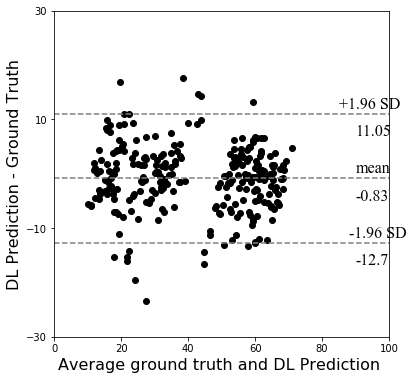

In [35]:
# Bland-Altman plot
def bland_altman_data(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data2 - data1                  # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    return mean,diff,md,sd,md+1.96*sd,md-1.96*sd

F = plt.figure(figsize=(6,6))

# plot 4
ax4 = F.add_subplot(111)
x = data['truth']
y = data['predict']
mean,diff,md,sd,up,bot = bland_altman_data(x,y)
ax4.scatter(mean, diff,color="black")
ax4.axhline(md,           color='gray', linestyle='--')
ax4.axhline(md + 1.96*sd, color='gray', linestyle='--')
ax4.axhline(md - 1.96*sd, color='gray', linestyle='--')

plt.xticks(np.arange(0,110,20))
plt.yticks(np.arange(-30,35,20))
plt.xlabel('Average ground truth and DL Prediction ',fontsize=16)
plt.ylabel("DL Prediction - Ground Truth",fontsize=16)
ax4.text(85,up+1,'+1.96 SD',fontdict=font1,fontsize = 16)
ax4.text(90,up-4,str(round(up,2)),fontdict=font1,fontsize = 16)
ax4.text(88,bot+1,'-1.96 SD',fontdict=font1,fontsize = 16)
ax4.text(90,bot-4,str(round(bot,2)),fontdict=font1,fontsize = 16)
ax4.text(90,md+1,'mean',fontdict=font1,fontsize = 16)
ax4.text(90,md-4,str(round(md,2)),fontdict=font1,fontsize = 16)

plt.xlim(left=0)

# save
F.savefig(os.path.join(main_path,'Bland altman plot for EF prediction.eps'), format='eps')

In [36]:
# t-test
from scipy.stats import ttest_ind
print(ttest_ind(x,y,equal_var = False))

Ttest_indResult(statistic=0.5155374728704097, pvalue=0.606389359649377)
